### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import time
from matplotlib import pyplot as plt

### Input Data

In [2]:
training = torchvision.datasets.MNIST(root='./Data', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing = torchvision.datasets.MNIST(root='./Data', train=False, download=True, transform=torchvision.transforms.ToTensor())

### Make Data Loader with proper batch size

In [3]:
train_load = DataLoader(training, batch_size=10,shuffle=True)
test_load = DataLoader(testing, batch_size=10,shuffle=False)

### Convolutional Network without dropout

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,64,3,1)
        self.conv2 = nn.Conv2d(64,64,3,1)
        self.fc1 = nn.Linear(64*5*5,256)
        self.fc2 = nn.Linear(256,10)
    
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,64*5*5)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X,dim=1)

### Adam Optimizer

In [5]:
cnn_model = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerAdam = torch.optim.Adam(cnn_model.parameters(),lr=0.001)

In [6]:
start = time.time()

iterations = 5
trainloss = []
testloss = []
trainacc = []
testacc = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerAdam.zero_grad()
        loss.backward()
        optimizerAdam.step()
        
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss.append(loss)
    trainacc.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss.append(loss)
    testacc.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.3073604106903076
Please Wait
Loss after 1 iterations = 0.07476262748241425
Please Wait
Loss after 2 iterations = 0.024816248565912247
Please Wait
Loss after 3 iterations = 0.0001408234820701182
Please Wait
Loss after 4 iterations = 3.659679805423366e-06
Please Wait
Loss after 5 iterations = 0.12337784469127655
Time required for training = 889.6375992298126 seconds


CNN with Adam Optimizer


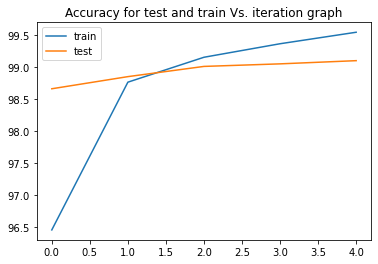

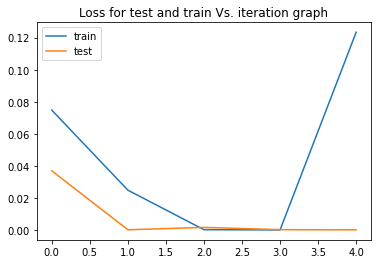

In [7]:
print("CNN with Adam Optimizer")
plt.plot([t/600 for t in trainacc],label="train")
plt.plot([t/100 for t in testacc],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss],label="train")
plt.plot([t for t in testloss],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [8]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when Adam optimizer is used = {correct.item()/len(testing)*100} %')

Accuracy when Adam optimizer is used = 99.1 %


### SGD Optimizer

In [9]:
cnn_model2 = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerSGD = torch.optim.SGD(cnn_model2.parameters(),lr=0.001, momentum = 0.9)

In [10]:
start = time.time()

iterations = 5
trainloss2 = []
testloss2 = []
trainacc2 = []
testacc2 = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model2(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerSGD.zero_grad()
        loss.backward()
        optimizerSGD.step()
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss2.append(loss)
    trainacc2.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model2(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss2.append(loss)
    testacc2.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.320693016052246
Please Wait
Loss after 1 iterations = 0.031132200732827187
Please Wait
Loss after 2 iterations = 0.024455055594444275
Please Wait
Loss after 3 iterations = 0.5727485418319702
Please Wait
Loss after 4 iterations = 0.0023342620115727186
Please Wait
Loss after 5 iterations = 0.0003417690168134868
Time required for training = 660.4573910236359 seconds


CNN with SGD Optimizer


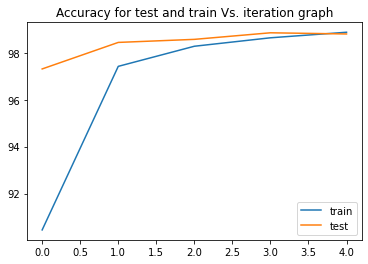

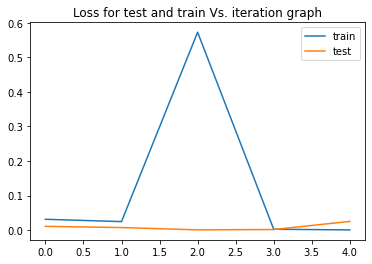

In [11]:
print("CNN with SGD Optimizer")
plt.plot([t/600 for t in trainacc2],label="train")
plt.plot([t/100 for t in testacc2],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss2],label="train")
plt.plot([t for t in testloss2],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [12]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model2(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when SGD optimizer is used = {correct.item()/len(testing)*100} %')

Accuracy when SGD optimizer is used = 98.8 %


### RMSProp Optimizer

In [13]:
cnn_model3 = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerRMSprop = torch.optim.RMSprop(cnn_model3.parameters(), lr=0.001)

In [14]:
start = time.time()

iterations = 5
trainloss3 = []
testloss3 = []
trainacc3 = []
testacc3 = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model3(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerRMSprop.zero_grad()
        loss.backward()
        optimizerRMSprop.step()
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss3.append(loss)
    trainacc3.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model3(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss3.append(loss)
    testacc3.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.324754476547241
Please Wait
Loss after 1 iterations = 0.515566885471344
Please Wait
Loss after 2 iterations = 0.0013765916228294373
Please Wait
Loss after 3 iterations = 0.004896835889667273
Please Wait
Loss after 4 iterations = 1.9739320123335347e-05
Please Wait
Loss after 5 iterations = 0.0013962200609967113
Time required for training = 693.4633693695068 seconds


CNN with RMSProp Optimizer


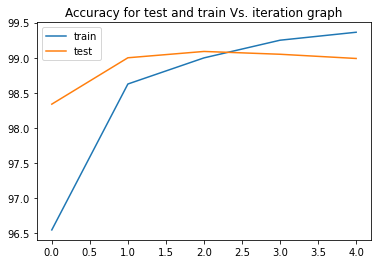

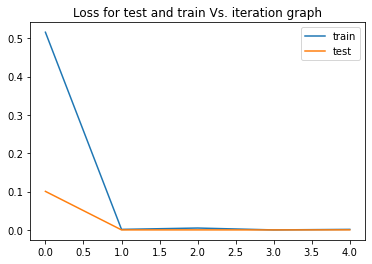

In [15]:
print("CNN with RMSProp Optimizer")
plt.plot([t/600 for t in trainacc3],label="train")
plt.plot([t/100 for t in testacc3],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss3],label="train")
plt.plot([t for t in testloss3],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [16]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model3(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when RMSprop optimizer is used = {correct.item()/len(testing)*100} %')

Accuracy when RMSprop optimizer is used = 98.99 %


### Adam Optimizer with Regularization

In [17]:
cnn_model4 = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerAdamRegu = torch.optim.Adam(cnn_model4.parameters(), lr=0.0001, weight_decay = 0.2)

In [18]:
start = time.time()

iterations = 5
trainloss4 = []
testloss4 = []
trainacc4 = []
testacc4 = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model4(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerAdamRegu.zero_grad()
        loss.backward()
        optimizerAdamRegu.step()
        
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss4.append(loss)
    trainacc4.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model4(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss4.append(loss)
    testacc4.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.2991201877593994
Please Wait
Loss after 1 iterations = 0.6966452598571777
Please Wait
Loss after 2 iterations = 0.8319665789604187
Please Wait
Loss after 3 iterations = 0.4823264479637146
Please Wait
Loss after 4 iterations = 0.6356643438339233
Please Wait
Loss after 5 iterations = 0.8061584234237671
Time required for training = 904.8326225280762 seconds


CNN with Adam Optimizer and Regularization


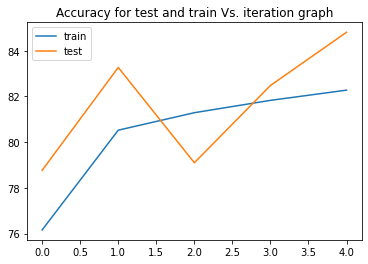

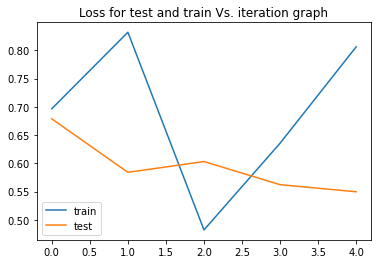

In [19]:
print("CNN with Adam Optimizer and Regularization")
plt.plot([t/600 for t in trainacc4],label="train")
plt.plot([t/100 for t in testacc4],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss4],label="train")
plt.plot([t for t in testloss4],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [20]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model4(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when Adam optimizer with regularization is = {correct.item()/len(testing)*100} %')

Accuracy when Adam optimizer with regularization is = 84.81 %


### SGD Optimizer with Regularization

In [21]:
cnn_model5 = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerSGDRegu = torch.optim.SGD(cnn_model5.parameters(), lr=0.00005, weight_decay = 0.2)

In [22]:
start = time.time()

iterations = 5
trainloss5 = []
testloss5 = []
trainacc5 = []
testacc5 = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model5(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerSGDRegu.zero_grad()
        loss.backward()
        optimizerSGDRegu.step()
        
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss5.append(loss)
    trainacc5.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model5(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss5.append(loss)
    testacc5.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.3354783058166504
Please Wait
Loss after 1 iterations = 2.287415027618408
Please Wait
Loss after 2 iterations = 2.298320770263672
Please Wait
Loss after 3 iterations = 2.2760403156280518
Please Wait
Loss after 4 iterations = 2.28043794631958
Please Wait
Loss after 5 iterations = 2.275409698486328
Time required for training = 575.867506980896 seconds


CNN with SGD Optimizer and Regularization


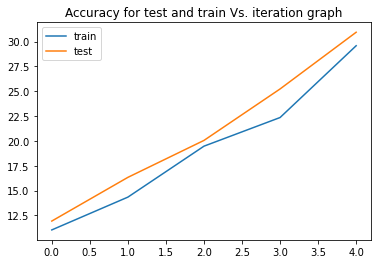

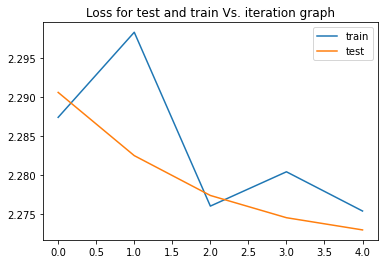

In [23]:
print("CNN with SGD Optimizer and Regularization")
plt.plot([t/600 for t in trainacc5],label="train")
plt.plot([t/100 for t in testacc5],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss5],label="train")
plt.plot([t for t in testloss5],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [24]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model5(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when SGD optimizer with regularization is = {correct.item()/len(testing)*100} %')

Accuracy when SGD optimizer with regularization is = 30.94 %


### RMSprop Optimizer with Regularization

In [26]:
cnn_model6 = CNN()
loss_function = nn.CrossEntropyLoss()
optimizerRMSpropRegu = torch.optim.RMSprop(cnn_model6.parameters(), lr=0.001, weight_decay = 0.2)

In [27]:
start = time.time()

iterations = 5
trainloss6 = []
testloss6 = []
trainacc6 = []
testacc6 = []

for i in range(iterations):
    tr_cr = 0
    ts_cr = 0
    print("Please Wait")
    for b,(X_train,Y_train) in enumerate(train_load):
        y_prob = cnn_model6(X_train)
        loss = loss_function(y_prob,Y_train)
        
        prediction = torch.max(y_prob.data,1)[1]
        corr_label = (prediction == Y_train).sum()
        tr_cr += corr_label
        
        optimizerRMSpropRegu.zero_grad()
        loss.backward()
        optimizerRMSpropRegu.step()
        
        if (i ==0 and b == 0):
            print(f"Initial Loss = {loss.item()}")
            print("Please Wait")
        lost = loss.item()
        
    print(f"Loss after {i+1} iterations = {lost}")
    trainloss6.append(loss)
    trainacc6.append(tr_cr)
        
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_load):
            y_prob = cnn_model6(X_test)
            prediction = torch.max(y_prob.data,1)[1]
            ts_cr += (prediction == Y_test).sum()
    
    loss = loss_function(y_prob,Y_test)
    testloss6.append(loss)
    testacc6.append(ts_cr)  
    
end = time.time()
elapsed = end - start
print(f"Time required for training = {elapsed} seconds")

Please Wait
Initial Loss = 2.315523147583008
Please Wait
Loss after 1 iterations = 2.298964738845825
Please Wait
Loss after 2 iterations = 2.3071320056915283
Please Wait
Loss after 3 iterations = 2.298710584640503
Please Wait
Loss after 4 iterations = 2.3072147369384766
Please Wait
Loss after 5 iterations = 2.300764322280884
Time required for training = 654.8117060661316 seconds


CNN with RMSprop Optimizer and Regularization


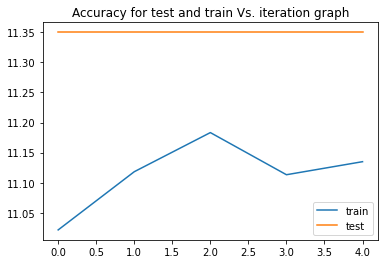

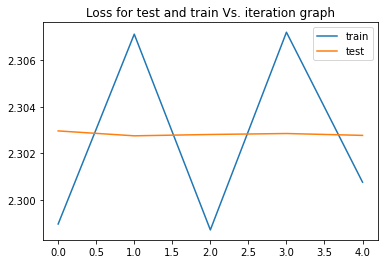

In [28]:
print("CNN with RMSprop Optimizer and Regularization")
plt.plot([t/600 for t in trainacc6],label="train")
plt.plot([t/100 for t in testacc6],label="test")
plt.title("Accuracy for test and train Vs. iteration graph")
plt.legend()
plt.show()

plt.plot([t for t in trainloss6],label="train")
plt.plot([t for t in testloss6],label="test")
plt.title("Loss for test and train Vs. iteration graph")
plt.legend()
plt.show()

In [29]:
with torch.no_grad():
    correct = 0
    for X_test,Y_test in test_load:
        y_prob = cnn_model6(X_test)
        prediction = torch.max(y_prob,1)[1]
        correct +=(prediction == Y_test).sum()
print(f'Accuracy when RMSprop optimizer with regularization is = {correct.item()/len(testing)*100} %')

Accuracy when RMSprop optimizer with regularization is = 11.35 %
